In [1]:
import approximator.run_approximator as ra
import visualization.optics_functions_for_approximator as opfa
import ROOT
import seaborn as sns
import pandas as pd
import numpy as np
import data.particles_generator as pg
import ROOT
import matplotlib.pyplot as plt
from ROOT import gSystem, gInterpreter
import seaborn
import data.madx_runner as mr
import pandas as pd
import approximator.run_approximator as ra
import os
home = "/home/rafalmucha/Pobrane/optic/"
file_name = "parametrization_6500GeV_0p4_185_reco"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2016/" + file_name + ".root"

"""
Get approximator from file. Use only once, since it initialize variables in ROOT, so with second use it is going
to explode. Sorry.
:param path_to_project: path to optics_generator_python. Needed files from it:
- properly initialized folder root_libs
- src/root_classes/include
:param path_to_file: path to file with serialized LHCOpticsApproximator object
:return: approximator object
"""
os.environ['LD_LIBRARY_PATH'] = path_to_project + "/root_libs"
gInterpreter.ProcessLine(".include " + path_to_project + "/src/root_classes/include")
gSystem.Load("LHCOpticsApproximator")
gInterpreter.ProcessLine('TFile *f=TFile::Open("' + path_to_file + '");')
gInterpreter.ProcessLine('std::auto_ptr<LHCOpticsApproximator> apr_near150 = std::auto_ptr<LHCOpticsApproximator>((LHCOpticsApproximator*) f->Get("' + approximator_name + '"));')
gInterpreter.ProcessLine("f->Close()")
gInterpreter.ProcessLine("double input[6];")
gInterpreter.ProcessLine("double output[5];")
aperture = ROOT.apr_near150
approximator = aperture

Welcome to JupyROOT 6.16/00


In [2]:
def plot(vector_x, vector_y, x_name, y_name):
    x_min = np.min(vector_x)
    
    x_max = np.max(vector_x)

    y_min = np.min(vector_y)

    y_max = np.max(vector_y)
    
    delta_x = x_max - x_min
    delta_y = y_max - y_min
    
    print(delta_x, delta_y)
    
    data_frame = pd.DataFrame(data={x_name: vector_x, y_name: vector_y})
    axes = sns.scatterplot(data = data_frame, x = x_name, y = y_name)
    
    axes.set_xlim(x_min - 0.25 * delta_x, x_max + 0.25 * delta_x)
    title = file_name + "\n" + approximator_name
    axes.set_title(y_name + " from " + x_name + "\n" + title) 
#     axes.set_ylim(y_min - 0.25 * delta_y, y_max + 0.25 * delta_y)

In [3]:
mapping = {
    "x": 0,
    "theta x": 1,
    "y": 2,
    "theta y": 3,
    "pt": 4,
    "result": 5
}

In [11]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0.0000
theta_x_mean = 0.000
sigma_theta_x = 0.00000
y_mean = 0.0
sigma_y = 0.0000
theta_y_mean = 0.00
sigma_theta_y = 0.00000
pt_mean = 0.075
sigma_pt = 0.075

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_t_values = 1
number_of_pt_values = 100

0.15 0.6018004330022451


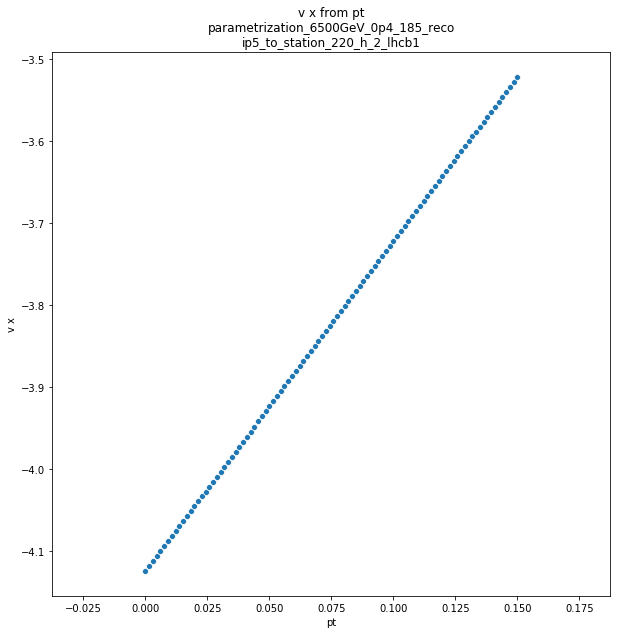

In [12]:
result_matrix = opfa.compute_v_x(approximator, 
                          x_mean - sigma_x, x_mean + sigma_x, number_of_x_values, 
                          theta_x_mean - sigma_theta_x, theta_x_mean + sigma_theta_x, number_of_theta_x_values,
                          y_mean - sigma_y, y_mean + sigma_y, number_of_y_values, 
                          theta_y_mean - sigma_theta_y, theta_y_mean + sigma_theta_y, number_of_theta_y_values,
                          pt_mean - sigma_pt, pt_mean + sigma_pt, number_of_pt_values)
x_name = "pt"
optic_parameter_name = "v x" 

fig = plt.gcf()
fig.set_size_inches(10,10)

x = result_matrix.T[mapping[x_name]].T
optic_function = result_matrix.T[mapping["result"]].T
plot(x, optic_function, x_name, optic_parameter_name)

0.15 1.3008924246702729


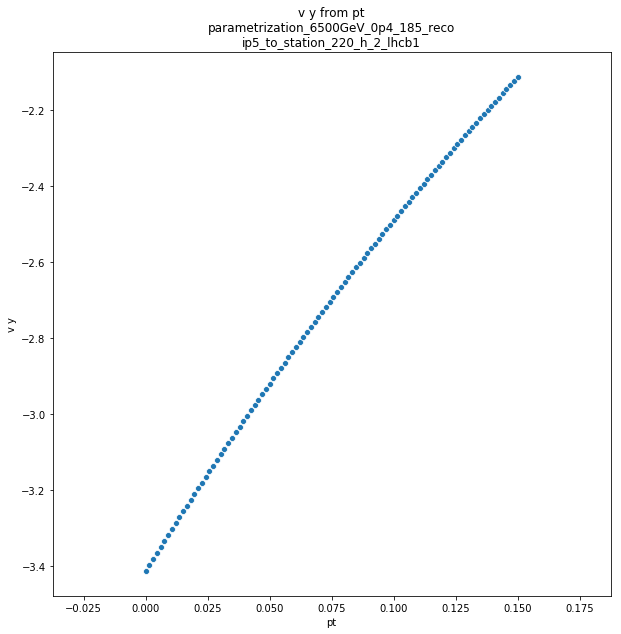

In [13]:
result_matrix = opfa.compute_v_y(approximator, 
                          x_mean - sigma_x, x_mean + sigma_x, number_of_x_values, 
                          theta_x_mean - sigma_theta_x, theta_x_mean + sigma_theta_x, number_of_theta_x_values,
                          y_mean - sigma_y, y_mean + sigma_y, number_of_y_values, 
                          theta_y_mean - sigma_theta_y, theta_y_mean + sigma_theta_y, number_of_theta_y_values,
                          pt_mean - sigma_pt, pt_mean + sigma_pt, number_of_pt_values)
x_name = "pt"
optic_parameter_name = "v y" 

fig = plt.gcf()
fig.set_size_inches(10,10)

x = result_matrix.T[mapping[x_name]].T
optic_function = result_matrix.T[mapping["result"]].T
plot(x, optic_function, x_name, optic_parameter_name)

0.15 42.168698550532504


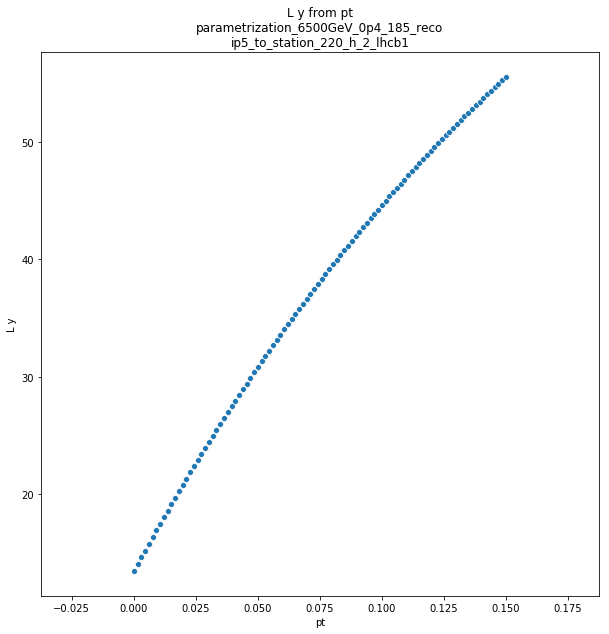

In [14]:
result_matrix = opfa.compute_l_y(approximator, 
                          x_mean - sigma_x, x_mean + sigma_x, number_of_x_values, 
                          theta_x_mean - sigma_theta_x, theta_x_mean + sigma_theta_x, number_of_theta_x_values,
                          y_mean - sigma_y, y_mean + sigma_y, number_of_y_values, 
                          theta_y_mean - sigma_theta_y, theta_y_mean + sigma_theta_y, number_of_theta_y_values,
                          pt_mean - sigma_pt, pt_mean + sigma_pt, number_of_pt_values)
x_name = "pt"
optic_parameter_name = "L y" 

fig = plt.gcf()
fig.set_size_inches(10,10)

x = result_matrix.T[mapping[x_name]].T
optic_function = result_matrix.T[mapping["result"]].T
plot(x, optic_function, x_name, optic_parameter_name)

0.15 34.886926239382966


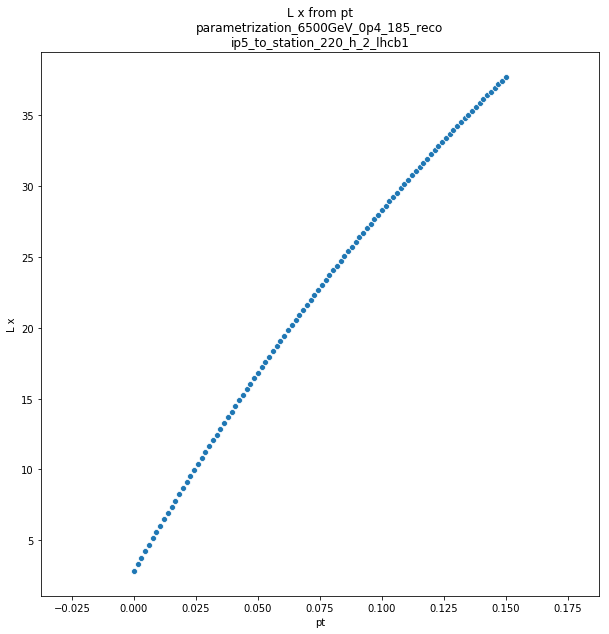

In [15]:
result_matrix = opfa.compute_l_x(approximator, 
                          x_mean - sigma_x, x_mean + sigma_x, number_of_x_values, 
                          theta_x_mean - sigma_theta_x, theta_x_mean + sigma_theta_x, number_of_theta_x_values,
                          y_mean - sigma_y, y_mean + sigma_y, number_of_y_values, 
                          theta_y_mean - sigma_theta_y, theta_y_mean + sigma_theta_y, number_of_theta_y_values,
                          pt_mean - sigma_pt, pt_mean + sigma_pt, number_of_pt_values)
x_name = "pt"
optic_parameter_name = "L x" 

fig = plt.gcf()
fig.set_size_inches(10,10)

x = result_matrix.T[mapping[x_name]].T
optic_function = result_matrix.T[mapping["result"]].T
plot(x, optic_function, x_name, optic_parameter_name)

0.15 0.03242490882997967


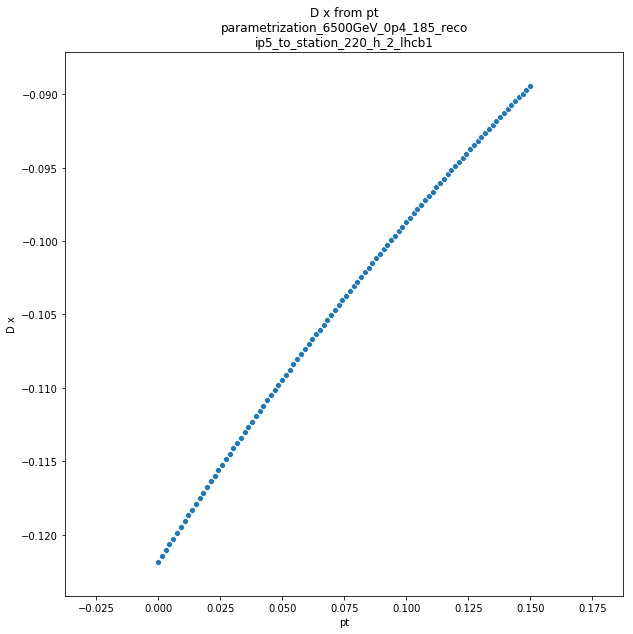

In [16]:
result_matrix = opfa.compute_d_x(approximator, 
                          x_mean - sigma_x, x_mean + sigma_x, number_of_x_values, 
                          theta_x_mean - sigma_theta_x, theta_x_mean + sigma_theta_x, number_of_theta_x_values,
                          y_mean - sigma_y, y_mean + sigma_y, number_of_y_values, 
                          theta_y_mean - sigma_theta_y, theta_y_mean + sigma_theta_y, number_of_theta_y_values,
                          pt_mean - sigma_pt, pt_mean + sigma_pt, number_of_pt_values)
x_name = "pt"
optic_parameter_name = "D x" 

fig = plt.gcf()
fig.set_size_inches(10,10)

x = result_matrix.T[mapping[x_name]].T
optic_function = result_matrix.T[mapping["result"]].T
plot(x, optic_function, x_name, optic_parameter_name)

0.15 0.0015557394203909634


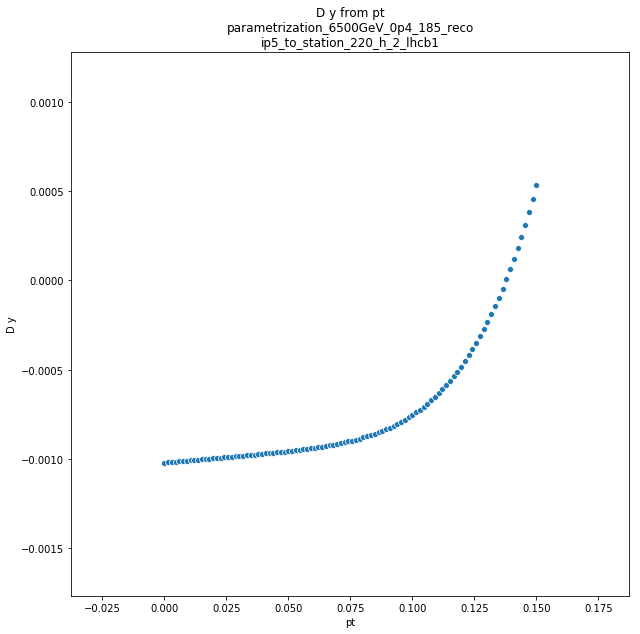

In [19]:
result_matrix = opfa.compute_d_y(approximator, 
                          x_mean - sigma_x, x_mean + sigma_x, number_of_x_values, 
                          theta_x_mean - sigma_theta_x, theta_x_mean + sigma_theta_x, number_of_theta_x_values,
                          y_mean - sigma_y, y_mean + sigma_y, number_of_y_values, 
                          theta_y_mean - sigma_theta_y, theta_y_mean + sigma_theta_y, number_of_theta_y_values,
                          pt_mean - sigma_pt, pt_mean + sigma_pt, number_of_pt_values)
x_name = "pt"
optic_parameter_name = "D y" 

fig = plt.gcf()
fig.set_size_inches(10,10)

x = result_matrix.T[mapping[x_name]].T
optic_function = result_matrix.T[mapping["result"]].T
plot(x, optic_function, x_name, optic_parameter_name)